In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.

In [2]:
pd.set_option('Max_columns',None)
pd.set_option('Max_rows',None)

In [3]:
df=pd.read_excel(r'/Users/markclampitt/Documents/Springboard/Capstone2/Data\Upcoming_Final_Game_df.xlsx')


In [4]:
df= df.dropna()

In [5]:
df.head()

Date  Year          Home Team  Home Team Ranking_x  Away Team  \
1 2021-11-27  2021                LSU                   99  Texas A&M   
2 2021-11-27  2021             Auburn                   99    Alabama   
3 2021-11-26  2021           Arkansas                   25   Missouri   
4 2021-11-25  2021  Mississippi State                   99   Ole Miss   
5 2021-11-20  2021     South Carolina                   99     Auburn   

   Away Team Ranking_x  Home Team Spread_x  Away Team Spread_x  Total_x  \
1                   15                 6.5                -6.5     27.0   
2                    3                19.5               -19.5     55.5   
3                   99               -14.5                14.5     63.0   
4                    9                -2.0                 2.0     65.0   
5                   99                 7.0                -7.0     45.5   

   Home Score_x_x  Away Score_x_x  Rolling 5 Past Away Score  \
1            27.0            24.0                      167.0   
2            22.0            24.0                      225.0   
3            34.0            17.0                      120.0   
4            21.0            31.0                      174.0   
5            21.0            17.0                      102.0   

   Rolling 5 Past Away Score Avg  Rolling 5 Past Away Score Max  \
1                           33.4                           48.0   
2                           45.0                           55.0   
3                           24.0                           37.0   
4                           34.8                           54.0   
5                           20.4                           38.0   

   Rolling 5 Past Away Score Min  Rolling 3 Past Away Score  \
1                           19.0                       88.0   
2                           31.0                      118.0   
3                            6.0                       71.0   
4                           20.0                       72.0   
5                            3.0                       65.0   

   Rolling 3 Past Away Score Avg  Rolling 3 Past Away Score Max  \
1                      29.333333                           35.0   
2                      39.333333                           49.0   
3                      23.666667                           37.0   
4                      24.000000                           31.0   
5                      21.666667                           38.0   

   Rolling 3 Past Away Score Min  Past Away Score  \
1                           19.0             19.0   
2                           31.0             49.0   
3                            6.0              6.0   
4                           20.0             20.0   
5                            3.0              3.0   

   Rolling 5 Past Away HI Pass yrds  Rolling 5 Past Away HI Pass yrds Avg  \
1                            1086.0                                 217.2   
2                            1550.0                                 310.0   
3                            1018.0                                 203.6   
4                            1396.0                                 279.2   
5                            1052.0                                 210.4   

   Rolling 5 Past Away HI Pass yrds Max  Rolling 5 Past Away HI Pass yrds Min  \
1                                 281.0                                 148.0   
2                                 385.0                                 208.0   
3                                 294.0                                  78.0   
4                                 412.0                                 213.0   
5                                 292.0                                 125.0   

   Rolling 3 Past Away HI Pass yrds  Rolling 3 Past Away HI Pass yrds Avg  \
1                             666.0                            222.000000   
2                             957.0                            319.000000   
3                             590.0             

# Home Score Correlations

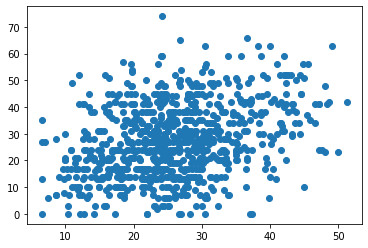

In [6]:
plt.scatter(df['Rolling 5 Past H&A Score Avg_Home_Team'],df['Home Score_x_x'])

In [10]:
df['Rolling 5 Past H&A Score Avg_Home_Team'].corr(df['Home Score_x_x'])

0.3355792221990728

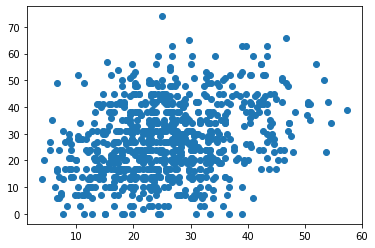

In [11]:
plt.scatter(df['Rolling 3 Past H&A Score Avg_Home_Team'],df['Home Score_x_x'])

In [12]:
df['Rolling 3 Past H&A Score Avg_Home_Team'].corr(df['Home Score_x_x'])

0.31094582375910795

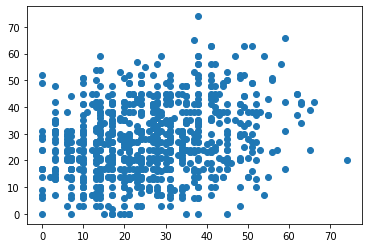

In [13]:
plt.scatter(df['Past H&A Score_Home_Team'],df['Home Score_x_x'])

In [14]:
df['Past H&A Score_Home_Team'].corr(df['Home Score_x_x'])

0.25373191732699407

In [ ]:
#Rolling past 5 games score avg is a better predictor than past 3 avg and previous score (for home team). 

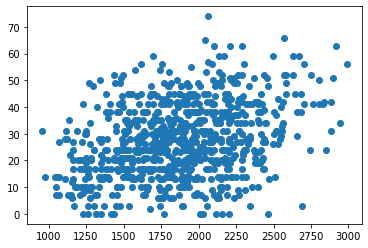

In [17]:
plt.scatter(df['Rolling 5 Past H&A Total Yards_Home_Team'],df['Home Score_x_x'])

In [18]:
df['Rolling 5 Past H&A Total Yards_Home_Team'].corr(df['Home Score_x_x'])

0.33297259536856344

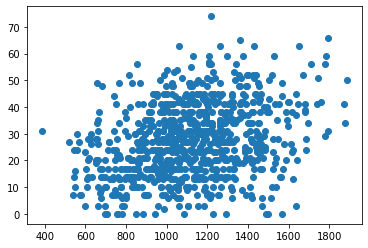

In [19]:
plt.scatter(df['Rolling 3 Past H&A Total Yards_Home_Team'],df['Home Score_x_x'])

In [20]:
df['Rolling 3 Past H&A Total Yards_Home_Team'].corr(df['Home Score_x_x'])

0.31090237590670405

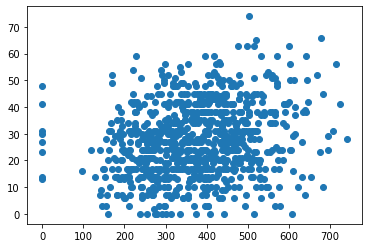

In [23]:
plt.scatter(df['Previous H&A Total Yards_Home_Team'],df['Home Score_x_x'])

In [22]:
df['Previous H&A Total Yards_Home_Team'].corr(df['Home Score_x_x']) 

0.22616763148663663

In [46]:
df_columns=df.columns

In [47]:
columns_list = []
for i in df_columns:
    columns_list.append(i)

In [48]:
columns_list

['Date',
 'Year',
 'Home Team',
 'Home Team Ranking_x',
 'Away Team',
 'Away Team Ranking_x',
 'Home Team Spread_x',
 'Away Team Spread_x',
 'Total_x',
 'Home Score_x_x',
 'Away Score_x_x',
 'Rolling 5 Past Away Score',
 'Rolling 5 Past Away Score Avg',
 'Rolling 5 Past Away Score Max',
 'Rolling 5 Past Away Score Min',
 'Rolling 3 Past Away Score',
 'Rolling 3 Past Away Score Avg',
 'Rolling 3 Past Away Score Max',
 'Rolling 3 Past Away Score Min',
 'Past Away Score',
 'Rolling 5 Past Away HI Pass yrds',
 'Rolling 5 Past Away HI Pass yrds Avg',
 'Rolling 5 Past Away HI Pass yrds Max',
 'Rolling 5 Past Away HI Pass yrds Min',
 'Rolling 3 Past Away HI Pass yrds',
 'Rolling 3 Past Away HI Pass yrds Avg',
 'Rolling 3 Past Away HI Pass yrds Max',
 'Rolling 3 Past Away HI Pass yrds Min',
 'Previous Away HI Pass yrds',
 'Rolling 5 Past Away HI Rush yrds',
 'Rolling 5 Past Away HI Rush yrds Avg',
 'Rolling 5 Past Away HI Rush yrds Max',
 'Rolling 5 Past Away HI Rush yrds Min',
 'Rolling 3 Pas

In [49]:
columns_list.remove('Date')

In [51]:
columns_list.remove('Year')
columns_list.remove('Home Team')
columns_list.remove('Away Team')

In [69]:
Prediction_Variable = df['Home Score_x_x']
Home_High_Corr_Values = []

In [73]:
for i in columns_list:
    corr = df[i].corr(Prediction_Variable) 
    print(i,":",corr)
    if corr > .3:
        Home_High_Corr_Values.append(i)
    if corr < -.3:
        Home_High_Corr_Values.append(i)

Home Team Ranking_x : -0.28374287778072627
Away Team Ranking_x : 0.21987459909653737
Home Team Spread_x : -0.47563477023586287
Away Team Spread_x : 0.47563477023586287
Total_x : 0.31168794927889404
Home Score_x_x : 1.0
Away Score_x_x : -0.046945847957658736
Rolling 5 Past Away Score : -0.11297209446751223
Rolling 5 Past Away Score Avg : -0.1129720944675123
Rolling 5 Past Away Score Max : -0.042412191756932754
Rolling 5 Past Away Score Min : -0.11585722952150117
Rolling 3 Past Away Score : -0.09356340517764229
Rolling 3 Past Away Score Avg : -0.09356340517764235
Rolling 3 Past Away Score Max : -0.04801241069062307
Rolling 3 Past Away Score Min : -0.09346990687697516
Past Away Score : -0.05733649621273218
Rolling 5 Past Away HI Pass yrds : 0.04334022221325469
Rolling 5 Past Away HI Pass yrds Avg : 0.043340222213254655
Rolling 5 Past Away HI Pass yrds Max : 0.08347857815158033
Rolling 5 Past Away HI Pass yrds Min : 0.00867745745388912
Rolling 3 Past Away HI Pass yrds : 0.0768525145277739


Rolling 5 Past Away Yards per Pass Min : -0.05298633369055773
Rolling 3 Past Away Yards per Pass : -0.06255327859622346
Rolling 3 Past Away Yards per Pass Avg : -0.06255327859622342
Rolling 3 Past Away Yards per Pass Max : -0.06052430550545391
Rolling 3 Past Away Yards per Pass Min : -0.05997826419606662
Previous Away Yards per Pass : -0.048820876212035756
Rolling 5 Past Away Rushing : -0.1002729889110368
Rolling 5 Past Away Rushing Avg : -0.10027298891103675
Rolling 5 Past Away Rushing Max : -0.05327082104809209
Rolling 5 Past Away Rushing Min : -0.11671344209809423
Rolling 3 Past Away Rushing : -0.0904340383915387
Rolling 3 Past Away Rushing Avg : -0.09043403839153871
Rolling 3 Past Away Rushing Max : -0.04990571768280376
Rolling 3 Past Away Rushing Min : -0.12318384079601499
Previous Away Rushing : -0.06406913070537902
Rolling 5 Past Away Rushing Attempts : -0.09891988049222347
Rolling 5 Past Away Rushing Attempts Avg : -0.09891988049222354
Rolling 5 Past Away Rushing Attempts Max :

Rolling 3 Past Home Season T Wins : 0.22471568132450792
Rolling 3 Past Home Season T Wins Avg : 0.22471568132450787
Rolling 3 Past Home Season T Wins Max : 0.2394977157919581
Rolling 3 Past Home Season T Wins Min : 0.13884538108151429
Previous Home Season T Wins : 0.17899998071048664
Rolling 5 Past Home Season T Losses : -0.2638701505158412
Rolling 5 Past Home Season T Losses Avg : -0.26387015051584106
Rolling 5 Past Home Season T Losses Max : -0.2546636782919915
Rolling 5 Past Home Season T Losses Min : -0.1763290210471806
Rolling 3 Past Home Season T Losses : -0.2812199283503901
Rolling 3 Past Home Season T Losses Avg : -0.2812199283503901
Rolling 3 Past Home Season T Losses Max : -0.26979096641811984
Rolling 3 Past Home Season T Losses Min : -0.23020037412281824
Previous Home Season Losses : -0.2442145172749352
Rolling 5 Past Home Conf T Losses : -0.26377375969106553
Rolling 5 Past Home Conf T Losses Avg : -0.26377375969106553
Rolling 5 Past Home Conf T Losses Max : -0.2551310250660

Rolling 5 Past Home Fumbles Lost Max : 0.05563924213549686
Rolling 5 Past Home Fumbles Lost Min : 0.01147568719118491
Rolling 3 Past Home Fumbles Lost : 0.062461954569545675
Rolling 3 Past Home Fumbles Lost Avg : 0.06246195456954569
Rolling 3 Past Home Fumbles Lost Max : 0.05706835381431682
Rolling 3 Past Home Fumbles Lost Min : 0.03410841065477655
Previous Home Fumbles Lost : 0.08041806747068646
Rolling 5 Past Home Interceptions Thrown : -0.12995483092182386
Rolling 5 Past Home Interceptions Thrown Avg : -0.12995483092182405
Rolling 5 Past Home Interceptions Thrown Max : -0.1212496241359934
Rolling 5 Past Home Interceptions Thrown Min : -0.09633625621224048
Rolling 3 Past Home Interceptions Thrown : -0.10351558743753504
Rolling 3 Past Home Interceptions Thrown Avg : -0.10351558743753504
Rolling 3 Past Home Interceptions Thrown Max : -0.0888047156365709
Rolling 3 Past Home Interceptions Thrown Min : -0.07492769372738704
Previous Home Interceptions Thrown : -0.09440214503833483
Rolling 

Rolling 3 Past H&A Completion Attempts Max_Home_Team : 0.029821921727365534
Rolling 3 Past H&A Completion Attempts Min_Home_Team : 0.028038901359035615
Previous H&A Completion Attempts_Home_Team : -0.0010384037323007559
Rolling 5 Past H&A Completion %_Home_Team : 0.3000817138148992
Rolling 5 Past H&A Completion % Avg_Home_Team : 0.3000817138148992
Rolling 5 Past H&A Completion % Max_Home_Team : 0.21557652353337364
Rolling 5 Past H&A Completion % Min_Home_Team : 0.23607411034503006
Rolling 3 Past H&A Completion %_Home_Team : 0.28423756522103427
Rolling 3 Past H&A Completion % Avg_Home_Team : 0.2842375652210342
Rolling 3 Past H&A Completion % Max_Home_Team : 0.23046014001685478
Rolling 3 Past H&A Completion % Min_Home_Team : 0.22835301443689077
Previous H&A Completion %_Home_Team : 0.2281637424126679
Rolling 5 Past H&A Total Yards_Home_Team : 0.33297259536856344
Rolling 5 Past H&A Total Yards Avg_Home_Team : 0.33297259536856355
Rolling 5 Past H&A Total Yards Max_Home_Team : 0.25619520072

Rolling 3 Past H&A Possession Time_Home_Team : 0.174078222286683
Rolling 3 Past H&A Possession Time Avg_Home_Team : 0.17407822228668296
Rolling 3 Past H&A Possession Time Max_Home_Team : 0.17321784836190443
Rolling 3 Past H&A Possession Time Min_Home_Team : 0.15524661250810495
Previous H&A Possession Time_Home_Team : 0.1500095724270758
Rolling 5 Past H&A Q1 Score_Home_Team : 0.2679769365001462
Rolling 5 Past H&A Q1 Score Avg_Home_Team : 0.26797693650014576
Rolling 5 Past H&A Q1 Score Max_Home_Team : 0.2227769928172596
Rolling 5 Past H&A Q1 Score Min_Home_Team : 0.1945206457471234
Rolling 3 Past H&A Q1 Score_Home_Team : 0.25772026661252617
Rolling 3 Past H&A Q1 Score Avg_Home_Team : 0.25772026661252617
Rolling 3 Past H&A Q1 Score Max_Home_Team : 0.2476685690915337
Rolling 3 Past H&A Q1 Score Min_Home_Team : 0.16566481644469291
Previous H&A Q1 Score_Home_Team : 0.220935753899384
Rolling 5 Past H&A Q2 Score_Home_Team : 0.22716804672123364
Rolling 5 Past H&A Q2 Score Avg_Home_Team : 0.2271

Rolling 5 Past H&A 3rd Down Conversion Attempts Min_Away_Team : 0.06989820146605484
Rolling 3 Past H&A 3rd Down Conversion Attempts_Away_Team : 0.05977226018380461
Rolling 3 Past H&A 3rd Down Conversion Attempts Avg_Away_Team : 0.059772260183804625
Rolling 3 Past H&A 3rd Down Conversion Attempts Max_Away_Team : 0.03206425355558431
Rolling 3 Past H&A 3rd Down Conversion Attempts Min_Away_Team : 0.0600956498987733
Previous H&A 3rd Down Conversions Attempts_Away_Team : 0.07723331778138932
Rolling 5 Past H&A 3rd Down Conversion %_Away_Team : -0.15232649287850605
Rolling 5 Past H&A 3rd Down Conversion % Avg_Away_Team : -0.15232649287850597
Rolling 5 Past H&A 3rd Down Conversion % Max_Away_Team : -0.09699616239135923
Rolling 5 Past H&A 3rd Down Conversion % Min_Away_Team : -0.1356460891940821
Rolling 3 Past H&A 3rd Down Conversion %_Away_Team : -0.13532884273567677
Rolling 3 Past H&A 3rd Down Conversion % Avg_Away_Team : -0.1353288427356768
Rolling 3 Past H&A 3rd Down Conversion % Max_Away_T

Rolling 3 Past H&A Q4 Score_Away_Team : -0.02921468970029196
Rolling 3 Past H&A Q4 Score Avg_Away_Team : -0.02921468970029194
Rolling 3 Past H&A Q4 Score Max_Away_Team : -0.0155411137912334
Rolling 3 Past H&A Q4 Score Min_Away_Team : -0.021116445919934626
Previous H&A Q4 Score_Away_Team : -0.036186137272505685
Rolling 5 Past H&A Total Odds_Away_Team : 0.18627979492545874
Rolling 5 Past H&A Total Odds Avg_Away_Team : 0.1862797949254587
Rolling 5 Past H&A Total Odds Max_Away_Team : 0.17736186218030348
Rolling 5 Past H&A Total Odds Min_Away_Team : 0.1457857304029922
Rolling 3 Past H&A Total Odds_Away_Team : 0.17072164763833908
Rolling 3 Past H&A Total Odds Avg_Away_Team : 0.17072164763833905
Rolling 3 Past H&A Total Odds Max_Away_Team : 0.16968724781657452
Rolling 3 Past H&A Total Odds Min_Away_Team : 0.1432874290079224
Previous H&A Total Odds_Away_Team : 0.16242562404316996
Rolling 5 Past H&A Spread_Away_Team : 0.2642362018235167
Rolling 5 Past H&A Spread Avg_Away_Team : 0.26423620182351

In [74]:
Home_High_Corr_Values

['Home Team Spread_x',
 'Away Team Spread_x',
 'Total_x',
 'Home Score_x_x',
 'Rolling 5 Past H&A Score_Home_Team',
 'Rolling 5 Past H&A Score Avg_Home_Team',
 'Rolling 3 Past H&A Score_Home_Team',
 'Rolling 3 Past H&A Score Avg_Home_Team',
 'Rolling 5 Past H&A Conf T Losses_Home_Team',
 'Rolling 5 Past H&A Conf T Losses Avg_Home_Team',
 'Rolling 5 Past H&A 1st Downs_Home_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
 'Rolling 3 Past H&A 1st Downs_Home_Team',
 'Rolling 3 Past H&A 1st Downs Avg_Home_Team',
 'Rolling 5 Past H&A Completion %_Home_Team',
 'Rolling 5 Past H&A Completion % Avg_Home_Team',
 'Rolling 5 Past H&A Total Yards_Home_Team',
 'Rolling 5 Past H&A Total Yards Avg_Home_Team',
 'Rolling 3 Past H&A Total Yards_Home_Team',
 'Rolling 3 Past H&A Total Yards Avg_Home_Team',
 'Rolling 5 Past H&A Yards per Pass_Home_Team',
 'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
 'Rolling 3 Past H&A Yards per Pass_Home_Team',
 'Rolling 3 Past H&A Yards per Pass Avg_Home_Team

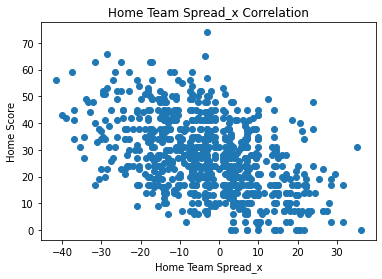

Home Team Spread_x : -0.47563477023586287


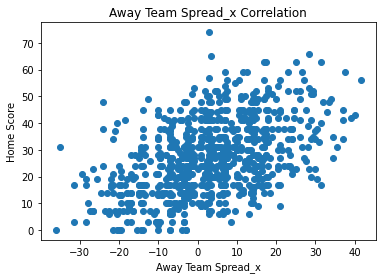

Away Team Spread_x : 0.47563477023586287


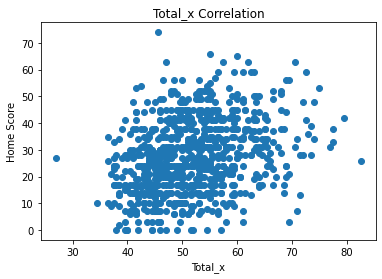

Total_x : 0.31168794927889404


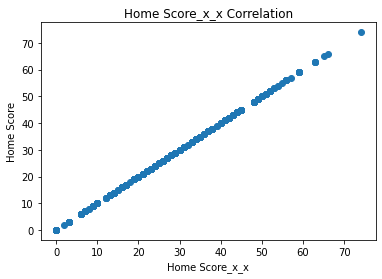

Home Score_x_x : 1.0


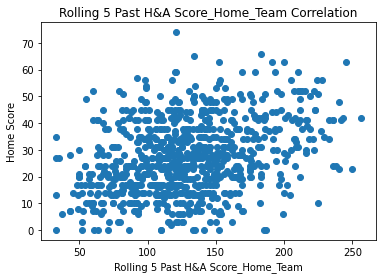

Rolling 5 Past H&A Score_Home_Team : 0.3355792221990727


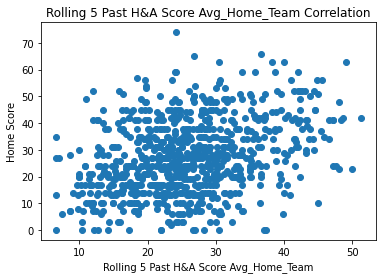

Rolling 5 Past H&A Score Avg_Home_Team : 0.3355792221990728


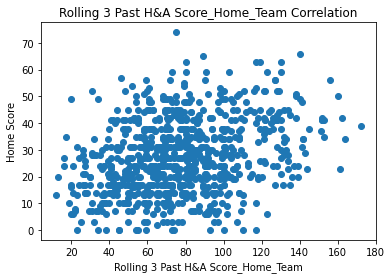

Rolling 3 Past H&A Score_Home_Team : 0.31094582375910784


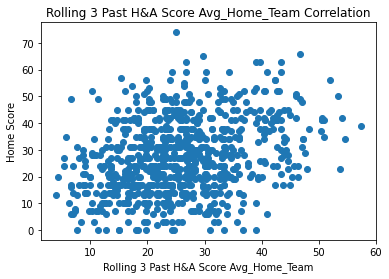

Rolling 3 Past H&A Score Avg_Home_Team : 0.31094582375910795


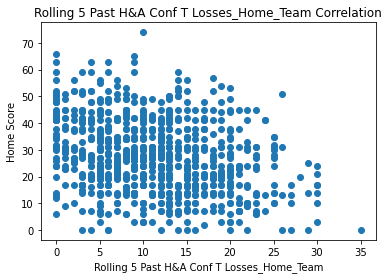

Rolling 5 Past H&A Conf T Losses_Home_Team : -0.3004335962831985


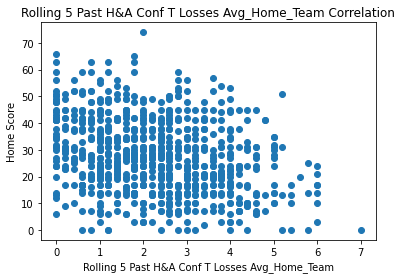

Rolling 5 Past H&A Conf T Losses Avg_Home_Team : -0.3004335962831985


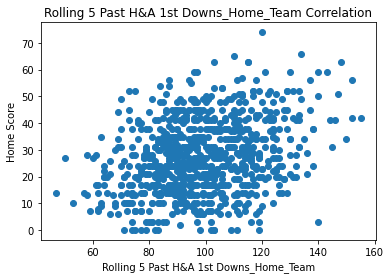

Rolling 5 Past H&A 1st Downs_Home_Team : 0.3138850949167664


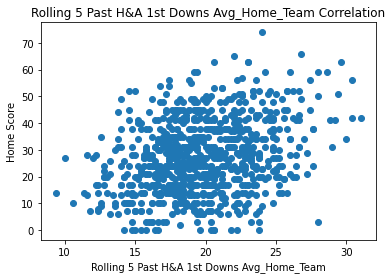

Rolling 5 Past H&A 1st Downs Avg_Home_Team : 0.3138850949167666


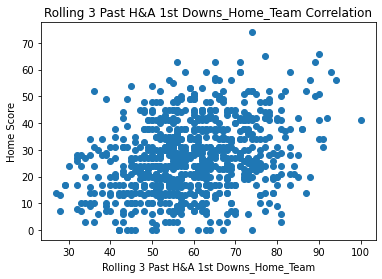

Rolling 3 Past H&A 1st Downs_Home_Team : 0.3075868662981074


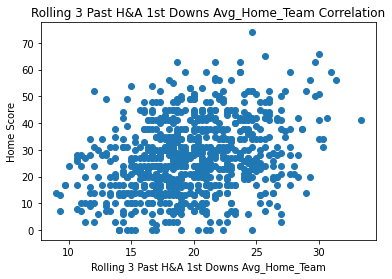

Rolling 3 Past H&A 1st Downs Avg_Home_Team : 0.3075868662981073


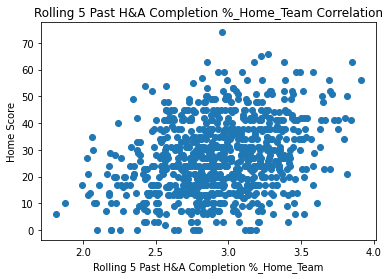

Rolling 5 Past H&A Completion %_Home_Team : 0.3000817138148992


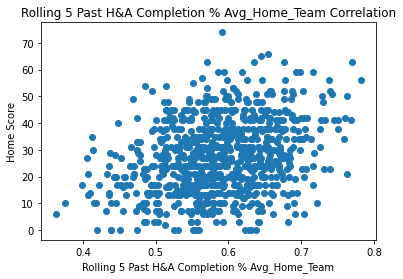

Rolling 5 Past H&A Completion % Avg_Home_Team : 0.3000817138148992


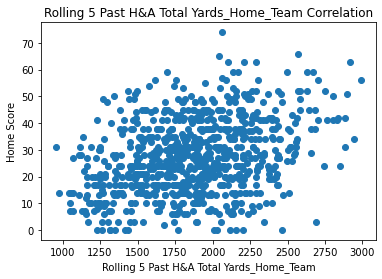

Rolling 5 Past H&A Total Yards_Home_Team : 0.33297259536856344


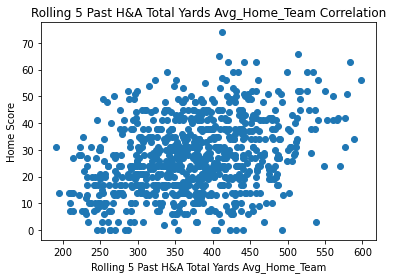

Rolling 5 Past H&A Total Yards Avg_Home_Team : 0.33297259536856355


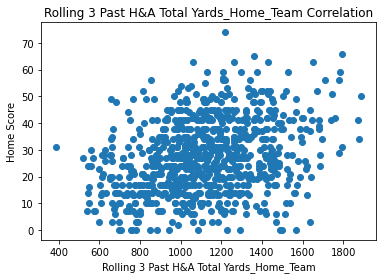

Rolling 3 Past H&A Total Yards_Home_Team : 0.31090237590670405


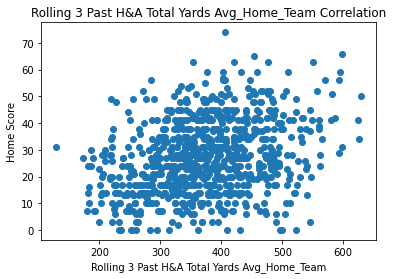

Rolling 3 Past H&A Total Yards Avg_Home_Team : 0.310902375906704


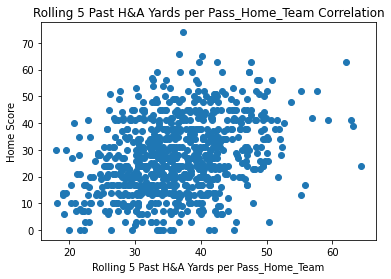

Rolling 5 Past H&A Yards per Pass_Home_Team : 0.32630799441901415


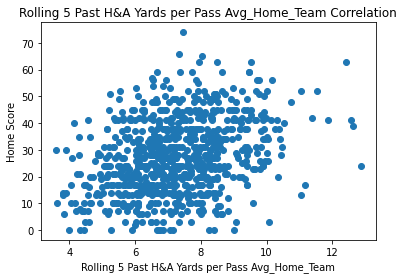

Rolling 5 Past H&A Yards per Pass Avg_Home_Team : 0.3263079944190141


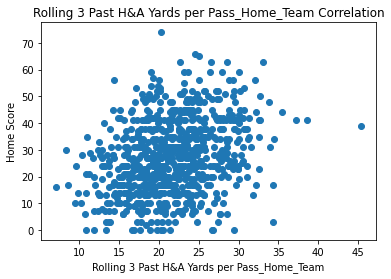

Rolling 3 Past H&A Yards per Pass_Home_Team : 0.30940174116510266


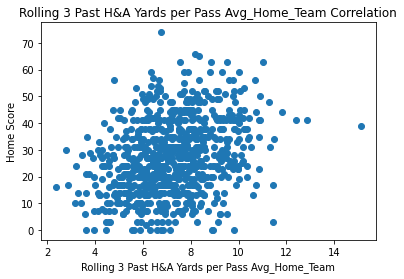

Rolling 3 Past H&A Yards per Pass Avg_Home_Team : 0.3094017411651026


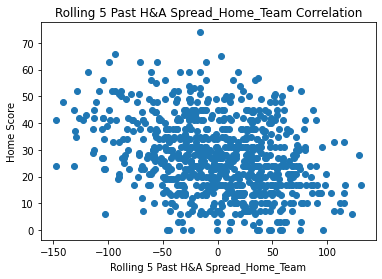

Rolling 5 Past H&A Spread_Home_Team : -0.31121040584453513


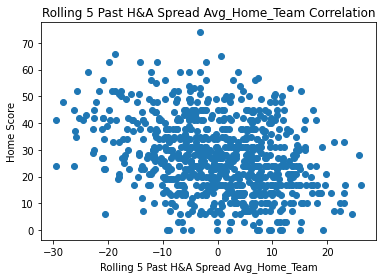

Rolling 5 Past H&A Spread Avg_Home_Team : -0.3112104058445353


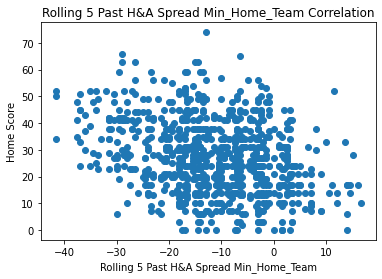

Rolling 5 Past H&A Spread Min_Home_Team : -0.3138492533682521


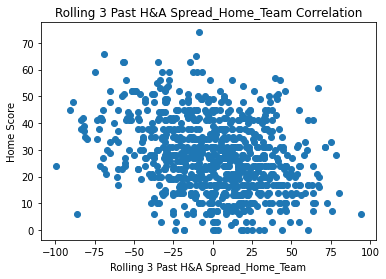

Rolling 3 Past H&A Spread_Home_Team : -0.3042432657668767


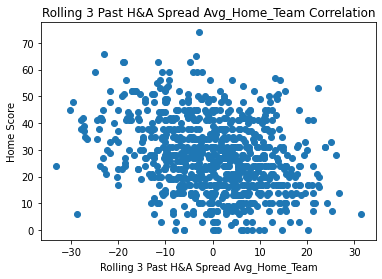

Rolling 3 Past H&A Spread Avg_Home_Team : -0.30424326576687666


In [75]:
for i in Home_High_Corr_Values:
    plt.scatter(df[i],df['Home Score_x_x'])
    plt.xlabel(i)
    plt.ylabel('Home Score')
    plt.title(i + " "+'Correlation')
    plt.show()
    print(i,":", df[i].corr(df['Home Score_x_x']) )

# Away Team Correlations

In [76]:
Away_High_Corr_Values =[]

In [79]:
Prediction_Variable =df['Away Score_x_x']

In [82]:
for i in columns_list:
    corr = df[i].corr(Prediction_Variable) 
    print(i,":",corr)
    if corr > .3:
        Away_High_Corr_Values.append(i)
    if corr < -.3:
        Away_High_Corr_Values.append(i)

Home Team Ranking_x : 0.25904053615354206
Away Team Ranking_x : -0.25659812581365116
Home Team Spread_x : 0.5222725911329417
Away Team Spread_x : -0.5222725911329417
Total_x : 0.2947392046296044
Home Score_x_x : -0.046945847957658736
Away Score_x_x : 0.9999999999999999
Rolling 5 Past Away Score : 0.28390493475999756
Rolling 5 Past Away Score Avg : 0.2839049347599976
Rolling 5 Past Away Score Max : 0.2381016972132814
Rolling 5 Past Away Score Min : 0.23145828410333855
Rolling 3 Past Away Score : 0.29786906824976034
Rolling 3 Past Away Score Avg : 0.2978690682497605
Rolling 3 Past Away Score Max : 0.2662882714129178
Rolling 3 Past Away Score Min : 0.2543214949499092
Past Away Score : 0.2199382268677675
Rolling 5 Past Away HI Pass yrds : 0.16886723216314659
Rolling 5 Past Away HI Pass yrds Avg : 0.1688672321631466
Rolling 5 Past Away HI Pass yrds Max : 0.1146130401908261
Rolling 5 Past Away HI Pass yrds Min : 0.16502225628790357
Rolling 3 Past Away HI Pass yrds : 0.18463620382427268
Rolli

Rolling 3 Past Away Passing Avg : 0.17869769536542657
Rolling 3 Past Away Passing Max : 0.13138050901820808
Rolling 3 Past Away Passing Min : 0.18150250356890418
Previous Away Passing : 0.14473721424655422
Rolling 5 Past Away Yards per Pass : 0.2597435553081616
Rolling 5 Past Away Yards per Pass Avg : 0.25974355530816173
Rolling 5 Past Away Yards per Pass Max : 0.2257745126901689
Rolling 5 Past Away Yards per Pass Min : 0.1849444064160247
Rolling 3 Past Away Yards per Pass : 0.28523411648824215
Rolling 3 Past Away Yards per Pass Avg : 0.2852341164882422
Rolling 3 Past Away Yards per Pass Max : 0.24522786782727496
Rolling 3 Past Away Yards per Pass Min : 0.23544591160401102
Previous Away Yards per Pass : 0.22494511289647368
Rolling 5 Past Away Rushing : 0.17977919899464775
Rolling 5 Past Away Rushing Avg : 0.17977919899464775
Rolling 5 Past Away Rushing Max : 0.12511383301032591
Rolling 5 Past Away Rushing Min : 0.16897687585486557
Rolling 3 Past Away Rushing : 0.18281263032261852
Rolli

Rolling 5 Past Home HI REC yrds Avg : 0.047117466547758786
Rolling 5 Past Home HI REC yrds Max : 0.054491906971824745
Rolling 5 Past Home HI REC yrds Min : 0.01981358076108777
Rolling 3 Past Home HI REC yrds : 0.037835340625412224
Rolling 3 Past Home HI REC yrds Avg : 0.03783534062541222
Rolling 3 Past Home HI REC yrds Max : 0.0344002830947496
Rolling 3 Past Home HI REC yrds Min : 0.021194668274083034
Previous Home HI REC yrds : 0.03709801402792031
Rolling 5 Past Home Season T Wins : -0.2243482668887715
Rolling 5 Past Home Season T Wins Avg : -0.22434826688877152
Rolling 5 Past Home Season T Wins Max : -0.19167404058301557
Rolling 5 Past Home Season T Wins Min : -0.18709646069446287
Rolling 3 Past Home Season T Wins : -0.2298518247536105
Rolling 3 Past Home Season T Wins Avg : -0.2298518247536105
Rolling 3 Past Home Season T Wins Max : -0.23428838023582993
Rolling 3 Past Home Season T Wins Min : -0.14781910677234186
Previous Home Season T Wins : -0.1307082225536651
Rolling 5 Past Home 

Rolling 3 Past Home Yards per Penalty Max : 0.053705682482597286
Rolling 3 Past Home Yards per Penalty Min : 0.08636732851955306
Previous Home Yards per Penalty : 0.027388039399067938
Rolling 5 Past Home Turnovers : -0.01619175861591536
Rolling 5 Past Home Turnovers Avg : -0.016191758615915347
Rolling 5 Past Home Turnovers Max : -0.06663879804664222
Rolling 5 Past Home Turnovers Min : -0.009987037157882295
Rolling 3 Past Home Turnovers : -0.024881379579829593
Rolling 3 Past Home Turnovers Avg : -0.0248813795798296
Rolling 3 Past Home Turnovers Max : -0.03618535500206644
Rolling 3 Past Home Turnovers Min : 0.02317384079103538
Previous Home Turnovers : 0.016329174318115567
Rolling 5 Past Home Fumbles Lost : -0.06647170543140077
Rolling 5 Past Home Fumbles Lost Avg : -0.06647170543140077
Rolling 5 Past Home Fumbles Lost Max : -0.049662044721486824
Rolling 5 Past Home Fumbles Lost Min : -0.06875414643458427
Rolling 3 Past Home Fumbles Lost : -0.07222284343569621
Rolling 3 Past Home Fumbles

Rolling 5 Past H&A Season T Losses Avg_Home_Team : 0.295242032315732
Rolling 5 Past H&A Season T Losses Max_Home_Team : 0.2753922540859555
Rolling 5 Past H&A Season T Losses Min_Home_Team : 0.2318339974655141
Rolling 3 Past H&A Season T Losses_Home_Team : 0.2806540401421868
Rolling 3 Past H&A Season T Losses Avg_Home_Team : 0.2806540401421868
Rolling 3 Past H&A Season T Losses Max_Home_Team : 0.2794090604480303
Rolling 3 Past H&A Season T Losses Min_Home_Team : 0.23336946014974858
Previous H&A Season Losses_Home_Team : 0.24530355997121595
Rolling 5 Past H&A Conf T Wins_Home_Team : -0.20731522942716737
Rolling 5 Past H&A Conf T Wins Avg_Home_Team : -0.20731522942716754
Rolling 5 Past H&A Conf T Wins Max_Home_Team : -0.26211899675316064
Rolling 5 Past H&A Conf T Wins Min_Home_Team : -0.029267917122571298
Rolling 3 Past H&A Conf T Wins_Home_Team : -0.13901350542226978
Rolling 3 Past H&A Conf T Wins Avg_Home_Team : -0.13901350542226984
Rolling 3 Past H&A Conf T Wins Max_Home_Team : -0.1652

Rolling 5 Past H&A Penalty Yards Avg_Home_Team : 0.03873196910508865
Rolling 5 Past H&A Penalty Yards Max_Home_Team : 0.02941843159030564
Rolling 5 Past H&A Penalty Yards Min_Home_Team : 0.002597423010403574
Rolling 3 Past H&A Penalty Yards_Home_Team : 0.00521754605887659
Rolling 3 Past H&A Penalty Yards Avg_Home_Team : 0.005217546058876592
Rolling 3 Past H&A Penalty Yards Max_Home_Team : 0.021613527771592762
Rolling 3 Past H&A Penalty Yards Min_Home_Team : -0.030045662663495665
Previous H&A Penalty Yards_Home_Team : -0.017025544978555043
Rolling 5 Past H&A Yards per Penalty_Home_Team : 0.07538548792561763
Rolling 5 Past H&A Yards per Penalty Avg_Home_Team : 0.07538548792561765
Rolling 5 Past H&A Yards per Penalty Max_Home_Team : 0.046978386330137366
Rolling 5 Past H&A Yards per Penalty Min_Home_Team : 0.008361192289089384
Rolling 3 Past H&A Yards per Penalty_Home_Team : 0.03673357129721417
Rolling 3 Past H&A Yards per Penalty Avg_Home_Team : 0.03673357129721418
Rolling 3 Past H&A Yard

Rolling 3 Past H&A Push Odds_Home_Team : -0.028363880817733333
Rolling 3 Past H&A Push Oddss Avg_Home_Team : -0.028363880817733368
Rolling 3 Past H&A Push OddsMax_Home_Team : -0.028363880817733333
Rolling 3 Past H&A Push Odds Min_Home_Team : nan
Rolling 5 Past H&A Score_Away_Team : 0.3395871846469022
Rolling 5 Past H&A Score Avg_Away_Team : 0.33958718464690213
Rolling 5 Past H&A Score Max_Away_Team : 0.3019083078413403
Rolling 5 Past H&A Score Min_Away_Team : 0.23451832514779722
Rolling 3 Past H&A Score_Away_Team : 0.29710388106548824
Rolling 3 Past H&A Score Avg_Away_Team : 0.2971038810654883
Rolling 3 Past H&A Score Max_Away_Team : 0.26176025678374354
Rolling 3 Past H&A Score Min_Away_Team : 0.22530228896464327
Past H&A Score_Away_Team : 0.20700178336068759
Rolling 5 Past H&A HI Pass yrds_Away_Team : 0.20808916901820865
Rolling 5 Past H&A HI Pass yrds Avg_Away_Team : 0.20808916901820854
Rolling 5 Past H&A HI Pass yrds Max_Away_Team : 0.1402445424638334
Rolling 5 Past H&A HI Pass yrds

Previous H&A Completion Attempts_Away_Team : 0.004324816883095862
Rolling 5 Past H&A Completion %_Away_Team : 0.2521424071927404
Rolling 5 Past H&A Completion % Avg_Away_Team : 0.25214240719274056
Rolling 5 Past H&A Completion % Max_Away_Team : 0.1776011182001254
Rolling 5 Past H&A Completion % Min_Away_Team : 0.18124260269328454
Rolling 3 Past H&A Completion %_Away_Team : 0.2252223268754433
Rolling 3 Past H&A Completion % Avg_Away_Team : 0.2252223268754433
Rolling 3 Past H&A Completion % Max_Away_Team : 0.17481521973486153
Rolling 3 Past H&A Completion % Min_Away_Team : 0.19071593028085349
Previous H&A Completion %_Away_Team : 0.18302728910182725
Rolling 5 Past H&A Total Yards_Away_Team : 0.31608011402165265
Rolling 5 Past H&A Total Yards Avg_Away_Team : 0.31608011402165276
Rolling 5 Past H&A Total Yards Max_Away_Team : 0.2532885472593974
Rolling 5 Past H&A Total Yards Min_Away_Team : 0.23569114190529356
Rolling 3 Past H&A Total Yards_Away_Team : 0.2577442414834479
Rolling 3 Past H&A 

Rolling 5 Past H&A Under Odds_Away_Team : -0.10672812274285268
Rolling 5 Past H&A Under Odds Avg_Away_Team : -0.10672812274285287
Rolling 5 Past H&A Under Odds Max_Away_Team : -0.03563446172353024
Rolling 5 Past H&A Under Odds Min_Away_Team : -0.07649034172202751
Rolling 3 Past H&A Under Odds_Away_Team : -0.06677675259097808
Rolling 3 Past H&A Under Oddss Avg_Away_Team : -0.0667767525909781
Rolling 3 Past H&A Under OddsMax_Away_Team : -0.0612525957713019
Rolling 3 Past H&A Under Odds Min_Away_Team : -0.06431726622031637
Previous H&A Under Odds_Away_Team : -0.02772835960026562
Rolling 5 Past H&A Push Odds_Away_Team : -0.013531584377068107
Rolling 5 Past H&A Push Odds Avg_Away_Team : -0.013531584377068093
Rolling 5 Past H&A Push Odds Max_Away_Team : -0.013531584377068107
Rolling 5 Past H&A Push Odds Min_Away_Team : nan
Rolling 3 Past H&A Push Odds_Away_Team : 0.0054518001635141455
Rolling 3 Past H&A Push Oddss Avg_Away_Team : 0.005451800163514127
Rolling 3 Past H&A Push OddsMax_Away_Team

In [83]:
Away_High_Corr_Values

['Home Team Spread_x',
 'Away Team Spread_x',
 'Away Score_x_x',
 'Rolling 5 Past H&A Score_Away_Team',
 'Rolling 5 Past H&A Score Avg_Away_Team',
 'Rolling 5 Past H&A Score Max_Away_Team',
 'Rolling 5 Past H&A Total Yards_Away_Team',
 'Rolling 5 Past H&A Total Yards Avg_Away_Team',
 'Rolling 5 Past H&A Yards per Pass_Away_Team',
 'Rolling 5 Past H&A Yards per Pass Avg_Away_Team',
 'Rolling 5 Past H&A Spread_Away_Team',
 'Rolling 5 Past H&A Spread Avg_Away_Team',
 'Rolling 5 Past H&A Ranking Max_Away_Team']

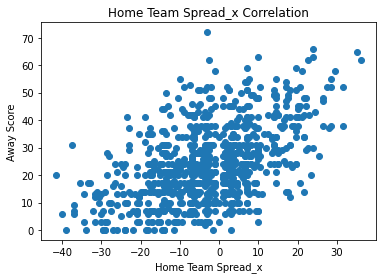

Home Team Spread_x : 0.5222725911329417


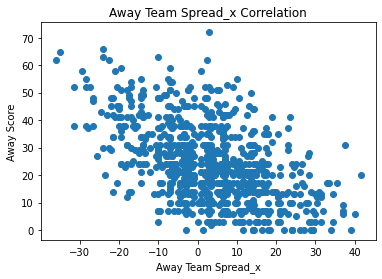

Away Team Spread_x : -0.5222725911329417


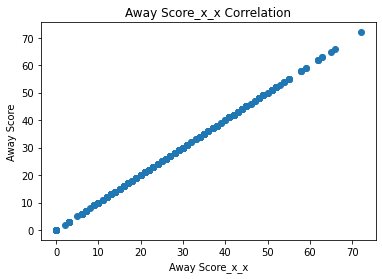

Away Score_x_x : 0.9999999999999999


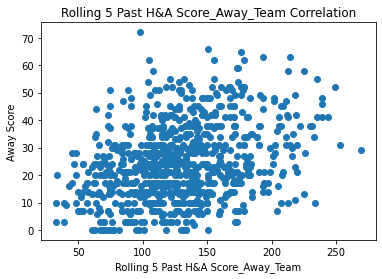

Rolling 5 Past H&A Score_Away_Team : 0.3395871846469022


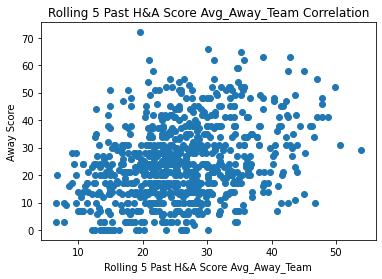

Rolling 5 Past H&A Score Avg_Away_Team : 0.33958718464690213


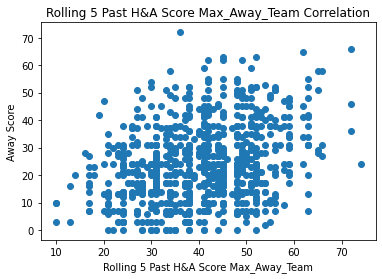

Rolling 5 Past H&A Score Max_Away_Team : 0.3019083078413403


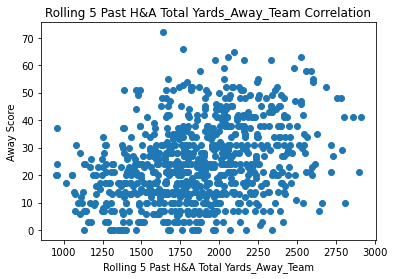

Rolling 5 Past H&A Total Yards_Away_Team : 0.31608011402165265


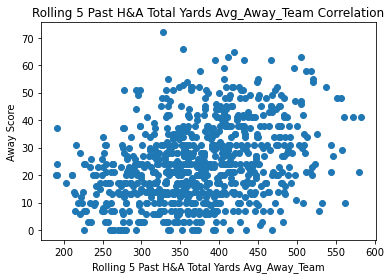

Rolling 5 Past H&A Total Yards Avg_Away_Team : 0.31608011402165276


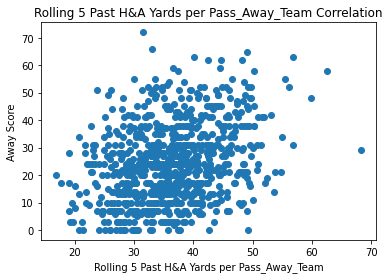

Rolling 5 Past H&A Yards per Pass_Away_Team : 0.31186265860247236


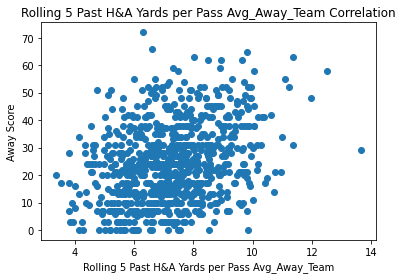

Rolling 5 Past H&A Yards per Pass Avg_Away_Team : 0.3118626586024724


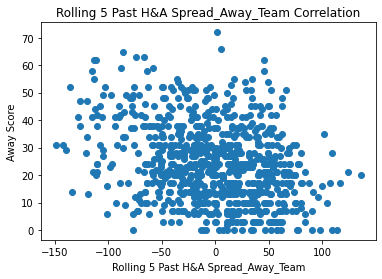

Rolling 5 Past H&A Spread_Away_Team : -0.3038601466765208


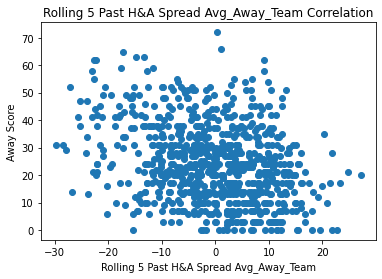

Rolling 5 Past H&A Spread Avg_Away_Team : -0.30386014667652095


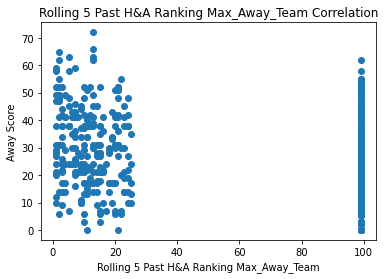

Rolling 5 Past H&A Ranking Max_Away_Team : -0.30279141877790466


In [84]:
for i in Away_High_Corr_Values:
    plt.scatter(df[i],df['Away Score_x_x'])
    plt.xlabel(i)
    plt.ylabel('Away Score')
    plt.title(i + " "+'Correlation')
    plt.show()
    print(i,":", df[i].corr(df['Away Score_x_x']) )

# Train Model Test

In [85]:
X = df[["Away Team Spread_x"]] 
y = df[["Away Score_x_x"]]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [87]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(623, 1) (208, 1) (623, 1) (208, 1)


In [88]:
rModel = linear_model.LinearRegression(normalize=True)

In [89]:
rModel.fit(X_train, y_train)

LinearRegression(normalize=True)

In [90]:
print(rModel.score(X_train, y_train))

0.2577013053251953


In [91]:
y_pred = rModel.predict(X_test)

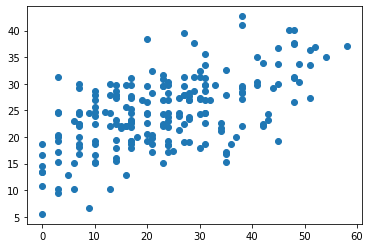

In [92]:
plt.scatter(y_test,y_pred)


# OLS

In [102]:
X=df['Away Team Spread_x']
X = sm.add_constant(X)

In [103]:
y=df['Away Score_x_x']

In [104]:
rModel2 = sm.OLS(y_train, X_train)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [106]:
rModel2 = sm.OLS(y_train, X_train)

In [107]:
rModel2_results = rModel2.fit()

In [108]:
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Away Score_x_x   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     215.6
Date:                Sun, 26 Dec 2021   Prob (F-statistic):           4.10e-42
Time:                        14:53:55   Log-Likelihood:                -2437.3
No. Observations:                 623   AIC:                             4879.
Df Residuals:                     621   BIC:                             4887.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 26.0939      0.500     52.235      0.000      25.113      27.075
Away Team Spread_x    -0.5270      0.036    -14.683      0.000      -0.598      -0.457
==============================================================================
Omnibus:                       24.927   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.990
Skew:                           0.507   Prob(JB):                     1.38e-06
Kurtosis:                       3.108   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
y_pred = rModel2_results.predict(X_test)

Text(0, 0.5, 'predictions')

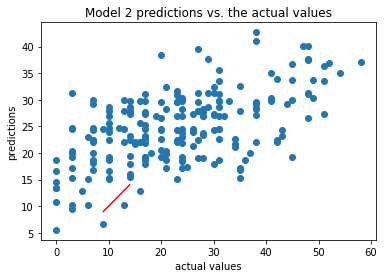

In [110]:
# Plot the predictions
# Build a scatterplot
plt.scatter(y_test,y_pred)

# Add a line for perfect correlation. Can you see what this line is doing? Use plot()
plt.plot([x for x in range(9,15)],[x for x in range(9,15)], color='red')

# Label it nicely
plt.title("Model 2 predictions vs. the actual values")
plt.xlabel ("actual values")
plt.ylabel("predictions")

# Multiple Linear Regression Model

In [124]:
X = df[['Away Team Spread_x','Rolling 5 Past H&A Score_Away_Team','Rolling 5 Past H&A Total Yards_Away_Team','Rolling 5 Past H&A Ranking Max_Away_Team']]
# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)
y = df[["Away Score_x_x"]]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [125]:
rModel3 = sm.OLS(y_train, X_train)

In [126]:
rModel3_results = rModel3.fit()

In [127]:
rModel3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Away Score_x_x   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     56.44
Date:                Sun, 26 Dec 2021   Prob (F-statistic):           1.36e-40
Time:                        15:09:44   Log-Likelihood:                -2433.1
No. Observations:                 623   AIC:                             4876.
Df Residuals:                     618   BIC:                             4898.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       18.6463      3.290      5.668      0.000      12.186      25.107
Away Team Spread_x                          -0.4781      0.044    -10.912      0.000      -0.564      -0.392
Rolling 5 Past H&A Score_Away_Team          -0.0025      0.025     -0.102      0.919      -0.051       0.046
Rolling 5 Past H&A Total Yards_Away_Team     0.0043      0.003      1.666      0.096      -0.001       0.009
Rolling 5 Past H&A Ranking Max_Away_Team    -0.0058      0.015     -0.385      0.701      -0.036       0.024
==============================================================================
Omnibus:                       23.019   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.662
Skew:                           0.483   Prob(JB):                     4.41e-06
Kurtosis:                       3.129   Cond. No.                     1.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Total Score

In [128]:
df['Total Actual Score'] = df['Home Score_x_x'] + df['Away Score_x_x']

In [129]:
TotalScore_High_Corr_Values =[]

In [130]:
Prediction_Variable =df['Total Actual Score']

In [131]:
for i in columns_list:
    corr = df[i].corr(Prediction_Variable) 
    print(i,":",corr)
    if corr > .3:
        TotalScore_High_Corr_Values.append(i)
    if corr < -.3:
        TotalsScore_High_Corr_Values.append(i)

Home Team Ranking_x : -0.01323463271583839
Away Team Ranking_x : -0.03068464789944459
Home Team Spread_x : 0.04233822050317029
Away Team Spread_x : -0.04233822050317029
Total_x : 0.4390637683749438
Home Score_x_x : 0.6812750998738152
Away Score_x_x : 0.6992373401430142
Rolling 5 Past Away Score : 0.12720389014203826
Rolling 5 Past Away Score Avg : 0.12720389014203826
Rolling 5 Past Away Score Max : 0.14413587068785688
Rolling 5 Past Away Score Min : 0.0867042939319262
Rolling 3 Past Away Score : 0.15132768783989867
Rolling 3 Past Away Score Avg : 0.15132768783989875
Rolling 3 Past Away Score Max : 0.1607840350883202
Rolling 3 Past Away Score Min : 0.11948139567736461
Past Away Score : 0.12014402857017564
Rolling 5 Past Away HI Pass yrds : 0.15476957276415293
Rolling 5 Past Away HI Pass yrds Avg : 0.15476957276415299
Rolling 5 Past Away HI Pass yrds Max : 0.14373634151391107
Rolling 5 Past Away HI Pass yrds Min : 0.12714443617928975
Rolling 3 Past Away HI Pass yrds : 0.19030966795327905

Rolling 3 Past Away Completions : 0.14961783896314365
Rolling 3 Past Away Completions Avg : 0.14961783896314348
Rolling 3 Past Away Completions Max : 0.1476615159629409
Rolling 3 Past Away Completions Min : 0.12057886089508821
Previous Away Completions : 0.08107289692624589
Rolling 5 Past Away Completion Attempts : 0.0920072942765892
Rolling 5 Past Away Completion Attempts Avg : 0.09200729427658924
Rolling 5 Past Away Completion Attempts Max : 0.07309882114301743
Rolling 5 Past Away Completion Attempts Min : 0.06225487855932712
Rolling 3 Past Away Completion Attempts : 0.10143859723166206
Rolling 3 Past Away Completion Attempts Avg : 0.10143859723166203
Rolling 3 Past Away Completion Attempts Max : 0.08890741090734934
Rolling 3 Past Away Completion Attempts Min : 0.0855179551583278
Previous Away Completion Attempts : 0.0323049383029905
Rolling 5 Past Away Completion % : 0.10365055819434876
Rolling 5 Past Away Completion % Avg : 0.10365055819434878
Rolling 5 Past Away Completion % Max :

Rolling 3 Past Away Over Odds Min : 0.007829471544841007
Previous Away Over Odds : 0.01597667558490464
Rolling 5 Past Away Under Odds : -0.028238251605476224
Rolling 5 Past Away Under Odds Avg : -0.02823825160547626
Rolling 5 Past Away Under Odds Max : 0.004300888092490211
Rolling 5 Past Away Under Odds Min : -0.014569345029879681
Rolling 3 Past Away Under Odds : -0.03010071922534322
Rolling 3 Past Away Under Oddss Avg : -0.03010071922534323
Rolling 3 Past Away Under OddsMax : -0.0022583594853075543
Rolling 3 Past Away Under Odds Min : -0.016269492116618055
Previous Away Under Odds : -0.00797287565568485
Rolling 5 Past Away Push Odds : -0.04195686693986678
Rolling 5 Past Away Push Odds Avg : -0.04195686693986678
Rolling 5 Past Away Push Odds Max : -0.04195686693986678
Rolling 5 Past Away Push Odds Min : nan
Rolling 3 Past Away Push Odds : -0.04383273300873315
Rolling 3 Past Away Push Oddss Avg : -0.04383273300873324
Rolling 3 Past Away Push OddsMax : -0.04383273300873315
Rolling 3 Past

Rolling 3 Past Home Rushing Attempts : 0.021579112528189504
Rolling 3 Past Home Rushing Attempts Avg : 0.021579112528189497
Rolling 3 Past Home Rushing Attempts Max : 0.014638455822345216
Rolling 3 Past Home Rushing Attempts Min : 0.014453669078347275
Previous Home Rushing Attempts : 0.005134512082229902
Rolling 5 Past Home Yards per Rush : 0.08484027997326746
Rolling 5 Past Home Yards per Rush Avg : 0.08484027997326744
Rolling 5 Past Home Yards per Rush Max : 0.08896122979827298
Rolling 5 Past Home Yards per Rush Min : 0.06968953798862142
Rolling 3 Past Home Yards per Rush : 0.08871511923940217
Rolling 3 Past Home Yards per Rush Avg : 0.08871511923940219
Rolling 3 Past Home Yards per Rush Max : 0.07252606820435833
Rolling 3 Past Home Yards per Rush Min : 0.09290684952107035
Previous Home Yards per Rush : 0.08028836255374226
Rolling 5 Past Home Penalties : 0.09743724537494003
Rolling 5 Past Home Penalties Avg : 0.0974372453749401
Rolling 5 Past Home Penalties Max : 0.04681721818546318


Rolling 3 Past Home Under Odds Min : -0.049575486319375466
Previous Home Under Odds : -0.0477006038973881
Rolling 5 Past Home Push Odds : 0.040098499774030044
Rolling 5 Past Home Push Odds Avg : 0.04009849977403004
Rolling 5 Past Home Push Odds Max : 0.040098499774030044
Rolling 5 Past Home Push Odds Min : nan
Rolling 3 Past Home Push Odds : 0.0008667355414320539
Rolling 3 Past Home Push Oddss Avg : 0.0008667355414320539
Rolling 3 Past Home Push OddsMax : 0.0008667355414320539
Rolling 3 Past Home Push Odds Min : nan
Previous Home Push Odds : 0.00037345340676126886
Rolling 5 Past Home Passing : 0.21486570840576608
Rolling 5 Past Home Passing Avg : 0.21486570840576608
Rolling 5 Past Home Passing Max : 0.1916091888385247
Rolling 5 Past Home Passing Min : 0.16425228347487086
Rolling 3 Past Home Passing : 0.19458134309594757
Rolling 3 Past Home Passing Avg : 0.19458134309594757
Rolling 3 Past Home Passing Max : 0.16449426615825524
Rolling 3 Past Home Passing Min : 0.17690589465435805
Rollin

Rolling 5 Past H&A Yards per Pass Avg_Home_Team : 0.15331338945144557
Rolling 5 Past H&A Yards per Pass Max_Home_Team : 0.08545709305862842
Rolling 5 Past H&A Yards per Pass Min_Home_Team : 0.14272491933375872
Rolling 3 Past H&A Yards per Pass_Home_Team : 0.16365236284102935
Rolling 3 Past H&A Yards per Pass Avg_Home_Team : 0.16365236284102924
Rolling 3 Past H&A Yards per Pass Max_Home_Team : 0.13342646529080832
Rolling 3 Past H&A Yards per Pass Min_Home_Team : 0.15436601051823154
Previous H&A Yards per Pass_Home_Team : 0.1137780815828274
Rolling 5 Past H&A Rushing_Home_Team : 0.033117874299137796
Rolling 5 Past H&A Rushing Avg_Home_Team : 0.033117874299137776
Rolling 5 Past H&A Rushing Max_Home_Team : 0.03848438536882688
Rolling 5 Past H&A Rushing Min_Home_Team : 0.033937360535204
Rolling 3 Past H&A Rushing_Home_Team : 0.03162621943449034
Rolling 3 Past H&A Rushing Avg_Home_Team : 0.03162621943449038
Rolling 3 Past H&A Rushing Max_Home_Team : 0.03227080811765475
Rolling 3 Past H&A Rus

Rolling 5 Past H&A Total Odds Avg_Home_Team : 0.2572937730020183
Rolling 5 Past H&A Total Odds Max_Home_Team : 0.22274020908301598
Rolling 5 Past H&A Total Odds Min_Home_Team : 0.24990320004090882
Rolling 3 Past H&A Total Odds_Home_Team : 0.27341333233554566
Rolling 3 Past H&A Total Odds Avg_Home_Team : 0.2734133323355457
Rolling 3 Past H&A Total Odds Max_Home_Team : 0.23698177110485955
Rolling 3 Past H&A Total Odds Min_Home_Team : 0.2749477663991375
Previous H&A Total Odds_Home_Team : 0.21917773559787104
Rolling 5 Past H&A Spread_Home_Team : -0.007311334591355244
Rolling 5 Past H&A Spread Avg_Home_Team : -0.007311334591355258
Rolling 5 Past H&A Spread Max_Home_Team : 0.03192005109969735
Rolling 5 Past H&A Spread Min_Home_Team : -0.03360652121625422
Rolling 3 Past H&A Spread_Home_Team : -0.019963924514523383
Rolling 3 Past H&A Spread Avg_Home_Team : -0.019963924514523394
Rolling 3 Past H&A Spread Max_Home_Team : 0.0040899380562426585
Rolling 3 Past H&A Spread Min_Home_Team : -0.0210042

Rolling 3 Past H&A 4th Down Conversions Max_Away_Team : 0.0038492521434240097
Rolling 3 Past H&A 4th Down Conversions Min_Away_Team : -0.027631593888493212
Previous H&A 4th Down Conversions_Away_Team : 0.00560420775932275
Rolling 5 Past H&A 4th Down Conversion Attempts_Away_Team : 0.006414045101633988
Rolling 5 Past H&A 4th Down Conversion Attempts Avg_Away_Team : 0.006414045101634031
Rolling 5 Past H&A 4th Down Conversion Attempts Max_Away_Team : 0.06728560756257519
Rolling 5 Past H&A 4th Down Conversion Attempts Min_Away_Team : -0.03271474451924416
Rolling 3 Past H&A 4th Down Conversion Attempts_Away_Team : -0.018679417668870626
Rolling 3 Past H&A 4th Down Conversion Attempts Avg_Away_Team : -0.018679417668870605
Rolling 3 Past H&A 4th Down Conversion Attempts Max_Away_Team : 0.00047955022306443745
Rolling 3 Past H&A 4th Down Conversion Attempts Min_Away_Team : -0.01065103867951277
Previous H&A 4th Down Conversions Attempts_Away_Team : 0.0012184315128505711
Rolling 5 Past H&A 4th Dow

Rolling 5 Past H&A Ranking Min_Away_Team : -0.008788243402923529
Rolling 3 Past H&A Ranking_Away_Team : -0.04261358794981505
Rolling 3 Past H&A Ranking Avg_Away_Team : -0.04261358794981507
Rolling 3 Past H&A Ranking Max_Away_Team : -0.049969759189052734
Rolling 3 Past H&A Ranking Min_Away_Team : -0.023825480279391402
Previous H&A Ranking_Away_Team : -0.07357087533887266
Rolling 5 Past H&A ATS Win_Away_Team : 0.011248239671462068
Rolling 5 Past H&A ATS Win Avg_Away_Team : 0.011248239671462015
Rolling 5 Past H&A ATS Win Max_Away_Team : -0.00690231683641922
Rolling 5 Past H&A ATS Win Min_Away_Team : 0.01080503918851235
Rolling 3 Past H&A ATS Win_Away_Team : 0.026771606032995235
Rolling 3 Past H&A ATS Win Avg_Away_Team : 0.026771606032995263
Rolling 3 Past H&A ATS Win Max_Away_Team : 0.01867125047313681
Rolling 3 Past H&A ATS Win Min_Away_Team : 0.0320024809339114
Previous H&A ATS Win_Away_Team : 0.015509759610911363
Rolling 5 Past H&A ATS Loss_Away_Team : -0.01683748400985366
Rolling 5 Pa

In [132]:
TotalScore_High_Corr_Values

['Total_x', 'Home Score_x_x', 'Away Score_x_x']

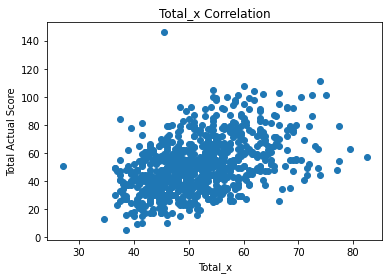

Total_x : 0.4390637683749438


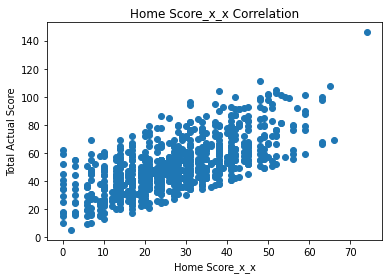

Home Score_x_x : 0.6812750998738152


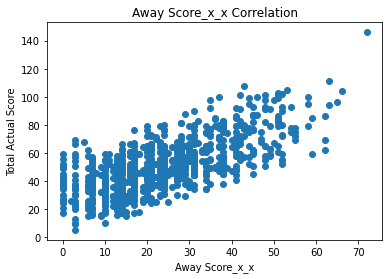

Away Score_x_x : 0.6992373401430142


In [133]:
for i in TotalScore_High_Corr_Values:
    plt.scatter(df[i],df['Total Actual Score'])
    plt.xlabel(i)
    plt.ylabel('Total Actual Score')
    plt.title(i + " "+'Correlation')
    plt.show()
    print(i,":", df[i].corr(df['Total Actual Score']) )

In [134]:
X = df[["Total_x"]] 
y = df[["Total Actual Score"]]

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [136]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(623, 1) (208, 1) (623, 1) (208, 1)


In [137]:
rModel = linear_model.LinearRegression(normalize=True)

In [138]:
rModel.fit(X_train, y_train)

LinearRegression(normalize=True)

In [139]:
print(rModel.score(X_train, y_train))

0.20480568696219725


In [140]:
y_pred = rModel.predict(X_test)

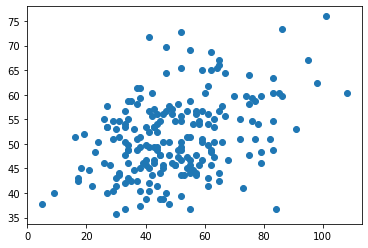

In [141]:
plt.scatter(y_test,y_pred)

# OLS

In [142]:
X=df['Total_x']
X = sm.add_constant(X)

In [143]:
y=df['Total Actual Score']

In [144]:
rModel2 = sm.OLS(y_train, X_train)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [146]:
rModel2 = sm.OLS(y_train, X_train)

In [147]:
rModel2_results = rModel2.fit()

In [148]:
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total Actual Score   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     159.9
Date:                Sun, 26 Dec 2021   Prob (F-statistic):           8.79e-33
Time:                        15:21:44   Log-Likelihood:                -2656.0
No. Observations:                 623   AIC:                             5316.
Df Residuals:                     621   BIC:                             5325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3811      4.333     -0.549      0.583     -10.891       6.129
Total_x        1.0445      0.083     12.647      0.000       0.882       1.207
==============================================================================
Omnibus:                       58.339   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.272
Skew:                           0.628   Prob(JB):                     7.54e-22
Kurtosis:                       4.474   Cond. No.                         330.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
y_pred = rModel2_results.predict(X_test)

Text(0, 0.5, 'predictions')

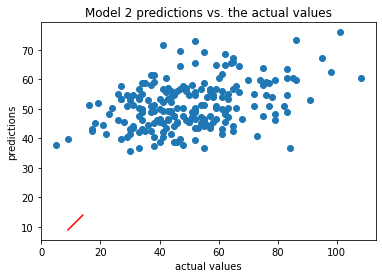

In [150]:
# Plot the predictions
# Build a scatterplot
plt.scatter(y_test,y_pred)

# Add a line for perfect correlation. Can you see what this line is doing? Use plot()
plt.plot([x for x in range(9,15)],[x for x in range(9,15)], color='red')

# Label it nicely
plt.title("Model 2 predictions vs. the actual values")
plt.xlabel ("actual values")
plt.ylabel("predictions")

# Multiple Linear Regression Model

In [151]:
X = df[['Total_x','Rolling 5 Past H&A Score_Away_Team','Rolling 5 Past H&A Score_Home_Team','Rolling 5 Past H&A Total Yards_Away_Team','Rolling 5 Past H&A Total Yards_Home_Team']]
# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)
y = df[["Total Actual Score"]]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [152]:
rModel3 = sm.OLS(y_train, X_train)

In [153]:
rModel3_results = rModel3.fit()

In [154]:
rModel3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total Actual Score   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     31.86
Date:                Sun, 26 Dec 2021   Prob (F-statistic):           6.62e-29
Time:                        15:27:38   Log-Likelihood:                -2655.9
No. Observations:                 623   AIC:                             5324.
Df Residuals:                     617   BIC:                             5350.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.0984      5.530     -0.741      0.459     -14.958       6.761
Total_x                                      1.0193      0.100     10.241      0.000       0.824       1.215
Rolling 5 Past H&A Score_Away_Team          -0.0021      0.031     -0.066      0.948      -0.064       0.060
Rolling 5 Past H&A Score_Home_Team          -0.0057      0.031     -0.183      0.855      -0.066       0.055
Rolling 5 Past H&A Total Yards_Away_Team     0.0012      0.004      0.311      0.756      -0.006       0.009
Rolling 5 Past H&A Total Yards_Home_Team     0.0010      0.004      0.269      0.788      -0.006       0.008
==============================================================================
Omnibus:                       57.725   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.888
Skew:                           0.624   Prob(JB):                     1.51e-21
Kurtosis:                       4.462   Cond. No.                     2.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""